
## Two-way Anova in R
#### refernces: http://www.sthda.com/english/wiki/two-way-anova-test-in-r       
#### https://rstudio-pubs-static.s3.amazonaws.com/67663_669e39c2153e4f8295f9d130abf07b7e.html
#### data source : https://www.reneshbedre.com/blog/anova.html



In [22]:
%reload_ext rpy2.ipython

In [25]:
%%capture
%%R
install.packages("reshape")

In [40]:
%%capture
%%R 
library(ggplot2) 
library(reshape)
library(dplyr)
library(tidyverse)

In [67]:
%%R 
# load data from the internet
my_data <- my_data <- read.delim("https://reneshbedre.github.io/assets/posts/anova/twowayanova.txt")
#melt columns x1-x3
my_data <- melt(my_data, id=c("Genotype")) 
head(my_data)


  Genotype variable value
1        A  X1_year  1.53
2        A  X1_year  1.83
3        A  X1_year  1.38
4        B  X1_year  3.60
5        B  X1_year  2.94
6        B  X1_year  4.02


In [68]:
%%R
#Change variable name
my_data <- my_data %>% 
      rename(Year=variable)

str(my_data)

'data.frame':	54 obs. of  3 variables:
 $ Genotype: chr  "A" "A" "A" "B" ...
 $ Year    : Factor w/ 3 levels "X1_year","X2_year",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ value   : num  1.53 1.83 1.38 3.6 2.94 4.02 3.99 3.3 4.41 3.75 ...


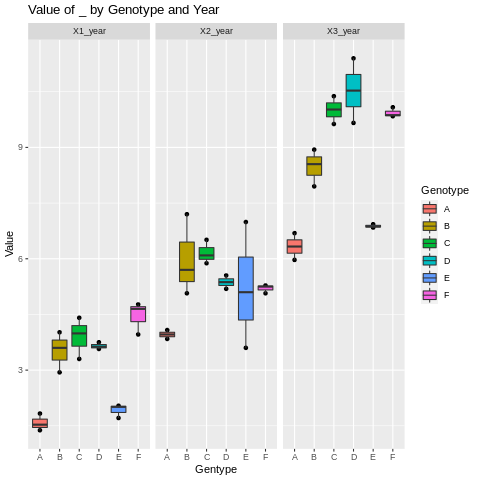

In [72]:
%%R 
qplot(Genotype,value,data=my_data, facets=~Year, main="Value of _ by Genotype and Year",xlab="Gentype", ylab="Value") + geom_boxplot(aes(fill = Genotype))

In [71]:
%%R
# split the data
Yr_1 = my_data$value[my_data$Year == 'X1_year']
Yr_2 = my_data$value[my_data$Year == 'X2_year']
Yr_3 = my_data$value[my_data$Year == 'X3_year']

In [73]:
%%R
table(my_data$Genotype, my_data$Year)

   
    X1_year X2_year X3_year
  A       3       3       3
  B       3       3       3
  C       3       3       3
  D       3       3       3
  E       3       3       3
  F       3       3       3


In [74]:
%%R
#From the ANOVA table we can conclude that both Genotype and Year are statistically significant, as well as their interaction
res.aov3 <- aov(value ~ Genotype* Year, data = my_data)
summary(res.aov3)

              Df Sum Sq Mean Sq F value   Pr(>F)    
Genotype       5  58.55   11.71  32.749 1.93e-12 ***
Year           2 278.93  139.46 390.015  < 2e-16 ***
Genotype:Year 10  17.12    1.71   4.789 0.000223 ***
Residuals     36  12.87    0.36                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [75]:
%%R
# Tukey pairwide comparision
TukeyHSD(res.aov3, which = "Genotype")

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = value ~ Genotype * Year, data = my_data)

$Genotype
           diff        lwr        upr     p adj
B-A  2.04000000  1.1919076  2.8880924 0.0000002
C-A  2.73333333  1.8852409  3.5814257 0.0000000
D-A  2.56000000  1.7119076  3.4080924 0.0000000
E-A  0.72000000 -0.1280924  1.5680924 0.1355132
F-A  2.57333333  1.7252409  3.4214257 0.0000000
C-B  0.69333333 -0.1547591  1.5414257 0.1634967
D-B  0.52000000 -0.3280924  1.3680924 0.4513532
E-B -1.32000000 -2.1680924 -0.4719076 0.0005279
F-B  0.53333333 -0.3147591  1.3814257 0.4232898
D-C -0.17333333 -1.0214257  0.6747591 0.9892318
E-C -2.01333333 -2.8614257 -1.1652409 0.0000003
F-C -0.16000000 -1.0080924  0.6880924 0.9925337
E-D -1.84000000 -2.6880924 -0.9919076 0.0000020
F-D  0.01333333 -0.8347591  0.8614257 1.0000000
F-E  1.85333333  1.0052409  2.7014257 0.0000017

